<a href="https://colab.research.google.com/github/Veera9014/practice-data-science-code/blob/main/assiated_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import warnings
 warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
items_list=[['milk','onion','nutmeg','kidney Beans','Eggs','Yogurt'],
            ['Dill','onion','nutmeg','kindey Beans','Eggs','Yogurt'],
            ['milk','Apple','kindey Beans','Eggs'],
            ['milk','onion','corn','kindey Beans','Yogurt'],
            ['corn','onion','onion','kindey Beans','Ice cream','Eggs']]

In [ ]:
te=TransactionEncoder()
te_ary=te.fit_transform(items_list)
te_ary

array([[False, False,  True, False,  True, False,  True, False,  True,
         True,  True],
       [False,  True,  True, False,  True, False, False,  True, False,
         True,  True],
       [ True, False,  True, False, False, False, False,  True,  True,
        False, False],
       [False, False, False, False,  True,  True, False,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True, False,
        False,  True]])

In [ ]:
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,Apple,Dill,Eggs,Ice cream,Yogurt,corn,kidney Beans,kindey Beans,milk,nutmeg,onion
0,False,False,True,False,True,False,True,False,True,True,True
1,False,True,True,False,True,False,False,True,False,True,True
2,True,False,True,False,False,False,False,True,True,False,False
3,False,False,False,False,True,True,False,True,True,False,True
4,False,False,True,True,False,True,False,True,False,False,True


In [ ]:
te.columns_

['Apple',
 'Dill',
 'Eggs',
 'Ice cream',
 'Yogurt',
 'corn',
 'kidney Beans',
 'kindey Beans',
 'milk',
 'nutmeg',
 'onion']

In [ ]:
frequent_itemsets=apriori(df,min_support=0.4,use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,0.6,(Yogurt)
2,0.4,(corn)
3,0.8,(kindey Beans)
4,0.6,(milk)
5,0.4,(nutmeg)
6,0.8,(onion)
7,0.4,"(Eggs, Yogurt)"
8,0.6,"(kindey Beans, Eggs)"
9,0.4,"(Eggs, milk)"


In [ ]:
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,0.6,(Yogurt),1
2,0.4,(corn),1
3,0.8,(kindey Beans),1
4,0.6,(milk),1
5,0.4,(nutmeg),1
6,0.8,(onion),1
7,0.4,"(Eggs, Yogurt)",2
8,0.6,"(kindey Beans, Eggs)",2
9,0.4,"(Eggs, milk)",2


In [ ]:
rules=association_rules(frequent_itemsets,num_itemsets=5,min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(nutmeg),(Eggs),0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000
1,(nutmeg),(Yogurt),0.4,0.6,0.4,1.0,1.666667,1.0,0.16,inf,0.666667,0.666667,1.0,0.833333
2,(Yogurt),(onion),0.6,0.8,0.6,1.0,1.250000,1.0,0.12,inf,0.500000,0.750000,1.0,0.875000
3,(corn),(kindey Beans),0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000
4,(corn),(onion),0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000
5,(nutmeg),(onion),0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000
6,"(Eggs, nutmeg)",(Yogurt),0.4,0.6,0.4,1.0,1.666667,1.0,0.16,inf,0.666667,0.666667,1.0,0.833333
7,"(Eggs, Yogurt)",(nutmeg),0.4,0.4,0.4,1.0,2.500000,1.0,0.24,inf,1.000000,1.000000,1.0,1.000000
8,"(nutmeg, Yogurt)",(Eggs),0.4,0.8,0.4,1.0,1.250000,1.0,0.08,inf,0.333333,0.500000,1.0,0.750000
9,(nutmeg),"(Eggs, Yogurt)",0.4,0.4,0.4,1.0,2.500000,1.0,0.24,inf,1.000000,1.000000,1.0,1.000000


In [ ]:
rel_rules=rules[rules.lift>2.4]
rel_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,"(Eggs, Yogurt)",(nutmeg),0.4,0.4,0.4,1.0,2.5,1.0,0.24,inf,1.0,1.0,1.0,1.0
9,(nutmeg),"(Eggs, Yogurt)",0.4,0.4,0.4,1.0,2.5,1.0,0.24,inf,1.0,1.0,1.0,1.0
25,"(Eggs, Yogurt, onion)",(nutmeg),0.4,0.4,0.4,1.0,2.5,1.0,0.24,inf,1.0,1.0,1.0,1.0
28,"(Eggs, Yogurt)","(nutmeg, onion)",0.4,0.4,0.4,1.0,2.5,1.0,0.24,inf,1.0,1.0,1.0,1.0
29,"(nutmeg, onion)","(Eggs, Yogurt)",0.4,0.4,0.4,1.0,2.5,1.0,0.24,inf,1.0,1.0,1.0,1.0
31,(nutmeg),"(Eggs, Yogurt, onion)",0.4,0.4,0.4,1.0,2.5,1.0,0.24,inf,1.0,1.0,1.0,1.0


In [ ]:
rel_rules.iloc[:,[0,1]]

,antecedents,consequents
7,"(Eggs, Yogurt)",(nutmeg)
9,(nutmeg),"(Eggs, Yogurt)"
25,"(Eggs, Yogurt, onion)",(nutmeg)
28,"(Eggs, Yogurt)","(nutmeg, onion)"
29,"(nutmeg, onion)","(Eggs, Yogurt)"
31,(nutmeg),"(Eggs, Yogurt, onion)"


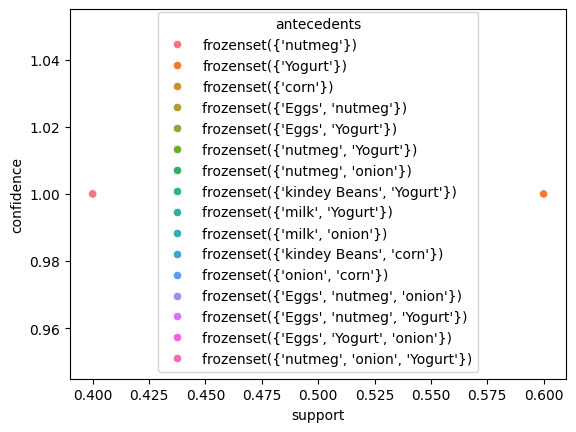

In [ ]:
import seaborn as sns
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.show()